<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 1*

---

# 📝 Assignment



## 1.데이터셋 불러오기 연습

다음 url에서 엑셀 파일을 불러오세요. (pandas excel)

<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx>

  - 데이터셋 변수의 이름은 `df1`, `df2`로 저장하세요.
  - row가 아닌 column에 '매출액', '영업이익' 이 가도록 데이터를 transpose 하세요.
  - 이후 아래 링크를 참조하여 첫번째 row를 column name으로 설정하세요.

<https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row>

- 파일은 2개의 시트로 구성되어 있으며 각각 이름은 `008770`, `035250` 입니다.



In [1]:
import pandas as pd

data_url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx'

In [2]:
# df1 - 008770 
df1 = pd.read_excel(data_url, sheet_name = '008770 ') # 엑셀 파일 불러오기
df1 = df1.transpose() # 행 <-> 열 자리 바꾸기

new_header1 = df1.iloc[0] # 데이터셋의 첫번째 행 가져오기
df1 = df1[1:] # 데이터셋의 2번째 행부터 끝 행까지 가져오기
df1.columns = new_header1 # 가져온 첫번째 행을 헤더로 설정

df1

주요재무정보,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%)
2019/09\n(IFRS연결),14753,574,574,376,274,277,-3,37747,28854,8893,8889,4,2000,1652,-284,-900,159,1493,19035,3.89,1.86,13.18,3.62,324.45,395.1,692,31.19,23484,3.67,0,NaN,0
2019/12\n(IFRS연결),15440,776,776,538,380,380,0,35273,26077,9195,9192,4,2000,-480,-208,1230,109,-589,15615,5.03,2.46,20.16,5.81,283.59,411.78,950,21.4,24282,3.74,350,NaN,34.94
2020/03\n(IFRS연결),9437,-668,-668,-925,-736,-736,0,33188,24813,8375,8371,4,2000,-4525,-237,1288,155,-4680,17505,-7.08,-7.8,5.39,1.25,296.28,368.36,-1839,63.76,22114,3.19,NaN,NaN,0
2020/06\n(IFRS연결),5230,-634,-634,-819,-677,-678,1,33039,25364,7676,7671,5,2000,879,-856,448,90,789,18933,-12.13,-12.95,-9.31,-2.14,330.45,334.46,-1695,NaN,20265,3.5,NaN,NaN,0
2020/09\n(IFRS연결),8795,-198,-198,-366,-285,-285,0,32683,25318,7365,7360,5,2000,3104,-1388,-882,129,2975,17755,-2.25,-3.24,-16.22,-3.74,343.77,320.21,-712,NaN,19444,3.91,NaN,NaN,NaN
2020/12(E)\n(IFRS연결),9980,50,NaN,-109,-100,-100,NaN,32388,25171,7216,7263,NaN,2000,NaN,NaN,NaN,NaN,NaN,NaN,0.5,-1.01,NaN,NaN,348.79,NaN,-251,NaN,19187,4.22,NaN,NaN,NaN
2021/03(E)\n(IFRS연결),9761,144,NaN,14,71,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.47,0.73,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,NaN,NaN,NaN
2021/06(E)\n(IFRS연결),9820,265,NaN,172,214,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,2.18,NaN,NaN,NaN,NaN,308,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# df2 - 035250
df2 = pd.read_excel(data_url, sheet_name = '035250')
df2 = df2.transpose()

new_header2 = df2.iloc[0]
df2 = df2[1:]
df2.columns = new_header2

df2

주요재무정보,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%)
2019/09\n(IFRS연결),4055,1392,1392,1554,1286,1286,0,41698,4781,36917,36916,NaN,1070,-22,-1260,-4,167,-189,48,34.33,31.72,8.27,7.2,12.95,3513.86,601,21,18209,1.62,0,NaN,0
2019/12\n(IFRS연결),3728,641,641,769,526,526,0,44381,7204,37178,37177,NaN,1070,2067,-2370,-4,383,1684,680,17.18,14.11,9.16,7.72,19.38,3538.24,246,18.92,18337,1.61,900,NaN,346.75
2020/03\n(IFRS연결),2360,-1868,-1868,-2204,-1561,-1561,0,43702,9945,33757,33757,NaN,1070,-684,909,-4,124,-808,651,-79.14,-66.15,2.21,1.75,29.46,3218.48,-730,55.53,16650,1.19,NaN,NaN,NaN
2020/06\n(IFRS연결),346,-1038,-1038,-723,-456,-456,0,39178,5900,33277,33277,1,1070,-3070,5414,-1842,82,-3153,639,-299.75,-131.55,-0.59,-0.5,17.73,3173.64,-213,NaN,16414,1.31,NaN,NaN,0
2020/09\n(IFRS연결),766,-649,-649,-552,-409,-409,0,37434,4560,32875,32874,0,1070,-1584,2327,-4,260,-1844,646,-84.68,-53.33,-5.44,-4.8,13.87,3136,-191,NaN,16215,1.33,NaN,NaN,NaN
2020/12(E)\n(IFRS연결),1581,-434,NaN,-331,-465,-314,NaN,38271,5998,32274,32212,NaN,1070,NaN,NaN,NaN,NaN,NaN,NaN,-27.49,-29.42,NaN,NaN,18.58,NaN,-147,NaN,15888,1.46,NaN,NaN,NaN
2021/03(E)\n(IFRS연결),1473,-187,NaN,NaN,NaN,-33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12.7,NaN,NaN,NaN,NaN,NaN,-15,NaN,NaN,NaN,NaN,NaN,NaN
2021/06(E)\n(IFRS연결),1746,-65,NaN,NaN,NaN,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.72,NaN,NaN,NaN,NaN,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN


## 2. 데이터 확인

- 데이터의 dimension을 확인하세요.
- 데이터의 결측치가 어디에 있는지 확인 후 0으로 대체하세요.
- 각 데이터 별로 **FCF**의 값을 barplot으로 시각화하세요.
  - 0보다 큰 값인 셀 개수의 총합을 `num1`에, 작은 값인 셀 개수의 총합을 `num2`에 저장하세요


In [4]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도

# 네이버 나눔 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') # 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 기호 오류 해결

In [5]:
# 데이터 디멘션 확인
df1.shape, df2.shape

((8, 32), (8, 32))

In [6]:
# 데이터 결측치 확인 및 0으로 대체
df1.isna()
df1.fillna(0)

df2.isna()
df2.fillna(0)

주요재무정보,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%)
2019/09\n(IFRS연결),4055.0,1392.0,1392.0,1554.0,1286.0,1286.0,0.0,41698.0,4781.0,36917.0,36916.0,0.0,1070.0,-22.0,-1260.0,-4.0,167.0,-189.0,48.0,34.33,31.72,8.27,7.20,12.95,3513.86,601.0,21.00,18209.0,1.62,0.0,0,0.00
2019/12\n(IFRS연결),3728.0,641.0,641.0,769.0,526.0,526.0,0.0,44381.0,7204.0,37178.0,37177.0,0.0,1070.0,2067.0,-2370.0,-4.0,383.0,1684.0,680.0,17.18,14.11,9.16,7.72,19.38,3538.24,246.0,18.92,18337.0,1.61,900.0,0,346.75
2020/03\n(IFRS연결),2360.0,-1868.0,-1868.0,-2204.0,-1561.0,-1561.0,0.0,43702.0,9945.0,33757.0,33757.0,0.0,1070.0,-684.0,909.0,-4.0,124.0,-808.0,651.0,-79.14,-66.15,2.21,1.75,29.46,3218.48,-730.0,55.53,16650.0,1.19,0.0,0,0.00
2020/06\n(IFRS연결),346.0,-1038.0,-1038.0,-723.0,-456.0,-456.0,0.0,39178.0,5900.0,33277.0,33277.0,1.0,1070.0,-3070.0,5414.0,-1842.0,82.0,-3153.0,639.0,-299.75,-131.55,-0.59,-0.50,17.73,3173.64,-213.0,0.00,16414.0,1.31,0.0,0,0.00
2020/09\n(IFRS연결),766.0,-649.0,-649.0,-552.0,-409.0,-409.0,0.0,37434.0,4560.0,32875.0,32874.0,0.0,1070.0,-1584.0,2327.0,-4.0,260.0,-1844.0,646.0,-84.68,-53.33,-5.44,-4.80,13.87,3136.00,-191.0,0.00,16215.0,1.33,0.0,0,0.00
2020/12(E)\n(IFRS연결),1581.0,-434.0,0.0,-331.0,-465.0,-314.0,0.0,38271.0,5998.0,32274.0,32212.0,0.0,1070.0,0.0,0.0,0.0,0.0,0.0,0.0,-27.49,-29.42,0.00,0.00,18.58,0.00,-147.0,0.00,15888.0,1.46,0.0,0,0.00
2021/03(E)\n(IFRS연결),1473.0,-187.0,0.0,0.0,0.0,-33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.70,0.00,0.00,0.00,0.00,0.00,-15.0,0.00,0.0,0.00,0.0,0,0.00
2021/06(E)\n(IFRS연결),1746.0,-65.0,0.0,0.0,0.0,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.72,0.00,0.00,0.00,0.00,0.00,63.0,0.00,0.0,0.00,0.0,0,0.00


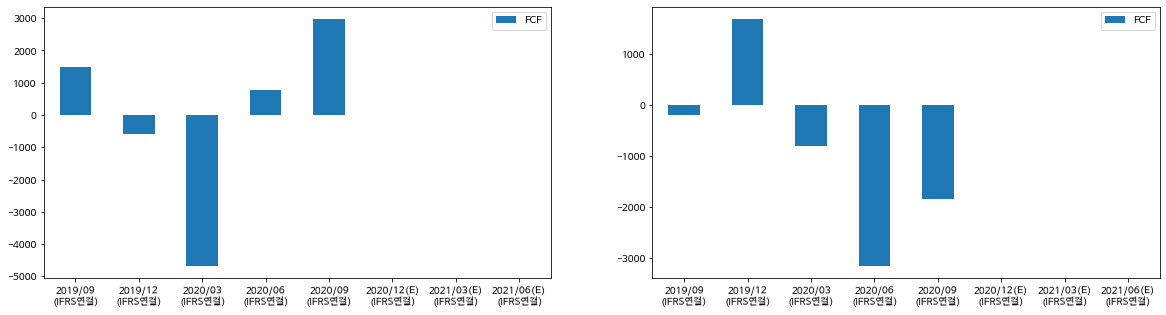

In [7]:
# df1, df2 각 데이터별 'FCF' 값을 barplot로 시각화
df1_fcf = pd.DataFrame(df1['FCF'], df1.index)
df2_fcf = pd.DataFrame(df2['FCF'], df2.index)

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20, 5)
df1_fcf.plot(ax=axes[0], kind='bar', rot = 1)
df2_fcf.plot(ax=axes[1], kind='bar', rot = 1)

In [8]:
# df1, df2 각각이 가진 FCF 값들 중 0보다 큰 값(num1)과 작은 값(num2) 개수 총합 구하기
num1 = sum((df1.FCF > 0) | (df2.FCF > 0))
num2 = sum((df1.FCF < 0) | (df2.FCF < 0))
num1, num2

(4, 5)

## 3. File export

- 읽었던 엑셀 파일의 내용을 2개의 csv로 각각 출력하세요. (python export csv)

  - 이름은 각각 `df1.csv`, `df2.csv` 입니다.


In [9]:
df1.to_csv('df1.csv', encoding='euc-kr')

In [10]:
df2.to_csv('df2.csv', encoding='euc-kr')

## 4. Error Handling

- 다음의 에러를 고치세요. 결과값은 6912가 나와야합니다.


In [11]:
a = '1234'
b = 5678

a = int(a)

a+b

6912

## 5. EDA

아래의 코드는 palmer penguin 데이터를 불러올 수 있는 코드입니다.

```python
import seaborn as sns

pp = sns.load_dataset('penguins')
```

이를 참조하여, `pp`의 `species`와 `sex`변수에 대해서 cross-tabulation을 시행하고, 6개의 값들 중 가장 큰 값을 `num3`에, 가장 작은 값을 `num4`에 저장하세요.

In [12]:
import seaborn as sns
 
pp = sns.load_dataset('penguins')

# cross-tabulation 시행
cross = pd.crosstab(index = pp['species'], columns=pp['sex'])
cross

sex,Female,Male
species,,
Adelie,73,73
Chinstrap,34,34
Gentoo,58,61


In [13]:
num3 = cross.to_numpy().max()
num4 = cross.to_numpy().min()

num3, num4

(73, 34)

## 🔥 도전과제 

### penguins 데이터를 계속 사용합니다.

이에 대해 아래의 task들을 시행하세요.

- 결측치 처리 (제거)

- bill_length_mm에 대해서 qqplot 그리기

- island에 대해서 다른 4개의 numerical feature 를 boxplot으로 표현하기

- 각 numerical feature에 대해서 summary statistics : mean, sd, Quantiles(1Q, 2Q, 3Q, 4Q)를 계산하세요.

In [14]:
# 데이터 결측치 제거
pp.dropna(how='any')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


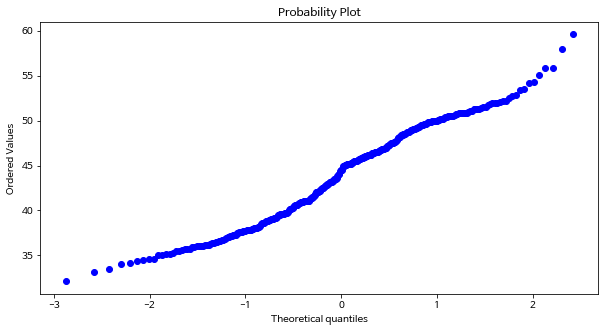

In [15]:
# bill_length_mm에 대해서 qqplot 그리기
import scipy.stats as stats

plt.figure(figsize = (10,5))
stats.probplot(pp['bill_length_mm'], plot=plt)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

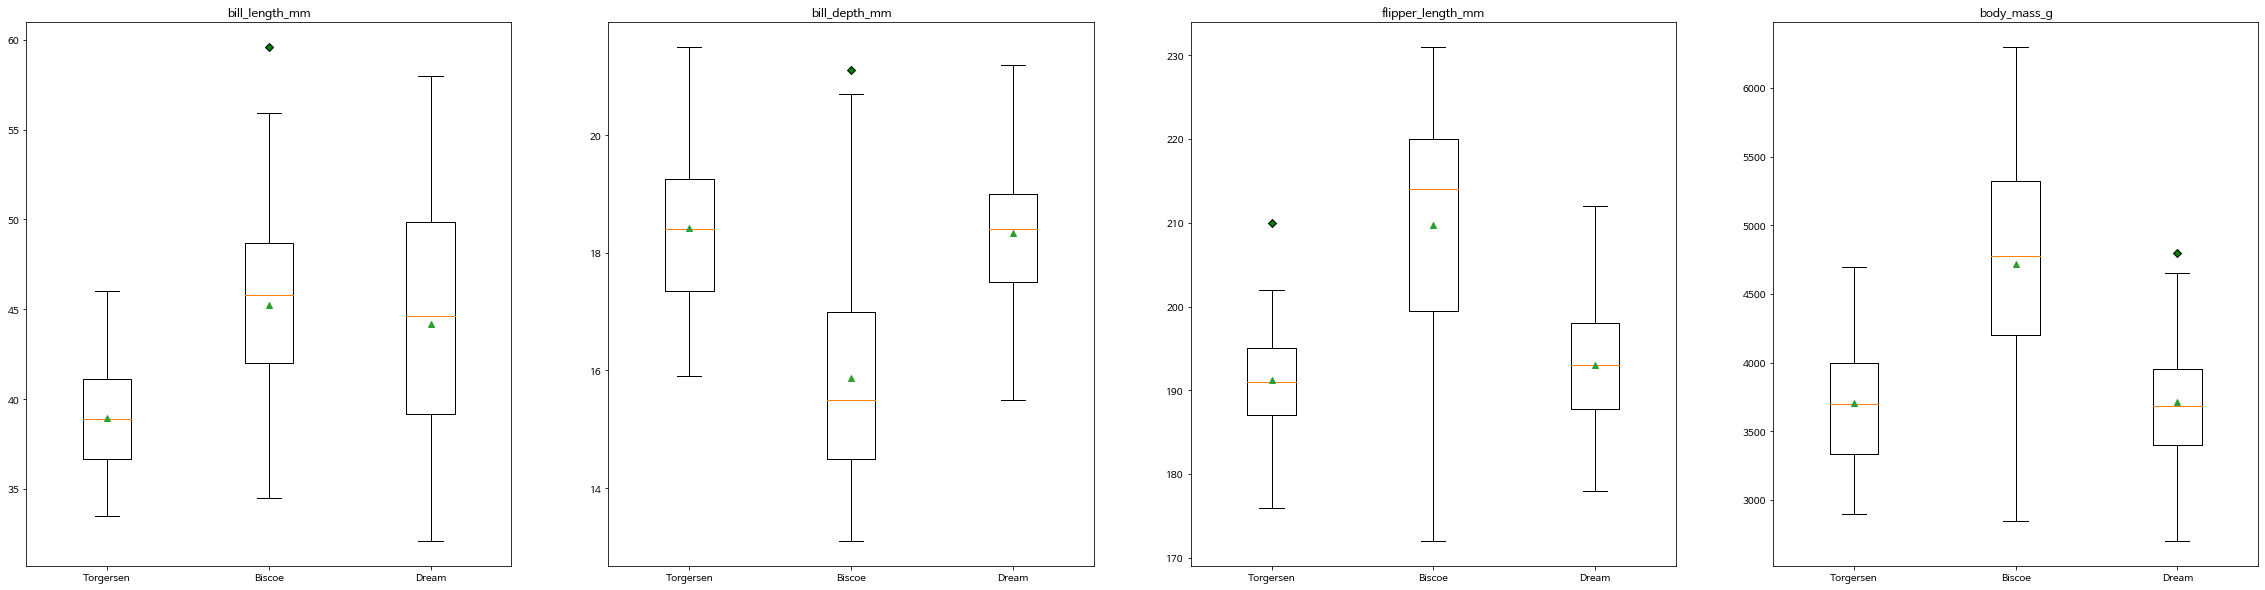

In [16]:
# island에 대해서 다른 4개의 numerical feature 를 boxplot으로 표현하기

island = pp.island.unique() # 데이터 내 island 종류 알아내기 -> 'Torgersen', 'Biscoe', 'Dream'

# boxplot에 넣을 데이터 세팅하기
data_bill_length_mm = [pp[pp['island']=='Torgersen']['bill_length_mm'].dropna(how='any'), 
        pp[pp['island']=='Biscoe']['bill_length_mm'].dropna(how='any'),
        pp[pp['island']=='Dream']['bill_length_mm'].dropna(how='any')]

data_bill_depth_mm = [pp[pp['island']=='Torgersen']['bill_depth_mm'].dropna(how='any'), 
        pp[pp['island']=='Biscoe']['bill_depth_mm'].dropna(how='any'),
        pp[pp['island']=='Dream']['bill_depth_mm'].dropna(how='any')]

data_flipper_length_mm = [pp[pp['island']=='Torgersen']['flipper_length_mm'].dropna(how='any'), 
        pp[pp['island']=='Biscoe']['flipper_length_mm'].dropna(how='any'),
        pp[pp['island']=='Dream']['flipper_length_mm'].dropna(how='any')]

data_body_mass_g = [pp[pp['island']=='Torgersen']['body_mass_g'].dropna(how='any'), 
        pp[pp['island']=='Biscoe']['body_mass_g'].dropna(how='any'),
        pp[pp['island']=='Dream']['body_mass_g'].dropna(how='any')]

# boxplot 그리기
green_diamond = dict(markerfacecolor='g', marker='D')
plt.figure(figsize = (40,10))

plt.subplot(1, 4, 1)
plt.boxplot(data_bill_length_mm, labels=['Torgersen', 'Biscoe', 'Dream'], showmeans=True, flierprops=green_diamond)
plt.title('bill_length_mm')

plt.subplot(1, 4, 2)
plt.boxplot(data_bill_depth_mm, labels=['Torgersen', 'Biscoe', 'Dream'], showmeans=True, flierprops=green_diamond)
plt.title('bill_depth_mm')

plt.subplot(1, 4, 3)
plt.boxplot(data_flipper_length_mm, labels=['Torgersen', 'Biscoe', 'Dream'], showmeans=True, flierprops=green_diamond)
plt.title('flipper_length_mm')

plt.subplot(1, 4, 4)
plt.boxplot(data_body_mass_g, labels=['Torgersen', 'Biscoe', 'Dream'], showmeans=True, flierprops=green_diamond)
plt.title('body_mass_g')

plt.show()

In [18]:
# (시간 부족으로 인해 수행하지 못함)